In [1]:
!pip install -q datasets
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q bitsandbytes sentencepiece accelerate loralib
!pip install -q -U git+https://github.com/huggingface/peft.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 32.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [1]:
import torch
from datasets import load_dataset
from peft import LoraConfig, get_peft_model
from PIL import Image
from transformers import IdeficsForVisionText2Text, AutoProcessor, Trainer, TrainingArguments, BitsAndBytesConfig
import torchvision.transforms as transforms

In [3]:
!pip install bitsandbytes

In [4]:
!pip install accelerate

In [6]:
!pip install accelerate --upgrade

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# checkpoint = "HuggingFaceM4/tiny-random-idefics"
checkpoint = "HuggingFaceM4/idefics-9b"

# Here we skip some special modules that can't be quantized properly
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    llm_int8_skip_modules=["lm_head", "embed_tokens"],
)

processor = AutoProcessor.from_pretrained(checkpoint)
# Simply take-off the quantization_config arg if you want to load the original model
model = IdeficsForVisionText2Text.from_pretrained(checkpoint, quantization_config=bnb_config, device_map="auto")

preprocessor_config.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/99.2k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/1.82G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00008-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00009-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00010-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00011-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00012-of-00019.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00013-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00014-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00015-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00016-of-00019.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00017-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00018-of-00019.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00019-of-00019.safetensors:   0%|          | 0.00/705M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/19 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [5]:
print(model)

IdeficsForVisionText2Text(
  (model): IdeficsModel(
    (embed_tokens): IdeficsDecoupledEmbedding(
      num_embeddings=32000, num_additional_embeddings=2, embedding_dim=4096, partially_freeze=False
      (additional_embedding): Embedding(2, 4096)
    )
    (vision_model): IdeficsVisionTransformer(
      (embeddings): IdeficsVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(257, 1280)
      )
      (pre_layrnorm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (encoder): IdeficsVisionEncoder(
        (layers): ModuleList(
          (0-31): 32 x IdeficsVisionEncoderLayer(
            (self_attn): IdeficsVisionAttention(
              (k_proj): Linear4bit(in_features=1280, out_features=1280, bias=True)
              (v_proj): Linear4bit(in_features=1280, out_features=1280, bias=True)
              (q_proj): Linear4bit(in_features=1280, out_features=1280, bias=True)
        

In [6]:
def check_inference(model, processor, prompts, max_new_tokens=50):
    tokenizer = processor.tokenizer
    bad_words = ["<image>", "<fake_token_around_image>"]
    if len(bad_words) > 0:
        bad_words_ids = tokenizer(bad_words, add_special_tokens=False).input_ids

    eos_token = "</s>"
    eos_token_id = tokenizer.convert_tokens_to_ids(eos_token)

    inputs = processor(prompts, return_tensors="pt").to(device)
    generated_ids = model.generate(**inputs, eos_token_id=[eos_token_id], bad_words_ids=bad_words_ids, max_new_tokens=max_new_tokens, early_stopping=True)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)

In [20]:
from transformers.image_utils import load_image
DEVICE = "cuda:0"

# Note that passing the image urls (instead of the actual pil images) to the processor is also possible
image1 = load_image("/content/testimg.jpg")
#image2 = load_image("https://cdn.britannica.com/59/94459-050-DBA42467/Skyline-Chicago.jpg")
#image3 = load_image("https://cdn.britannica.com/68/170868-050-8DDE8263/Golden-Gate-Bridge-San-Francisco.jpg")

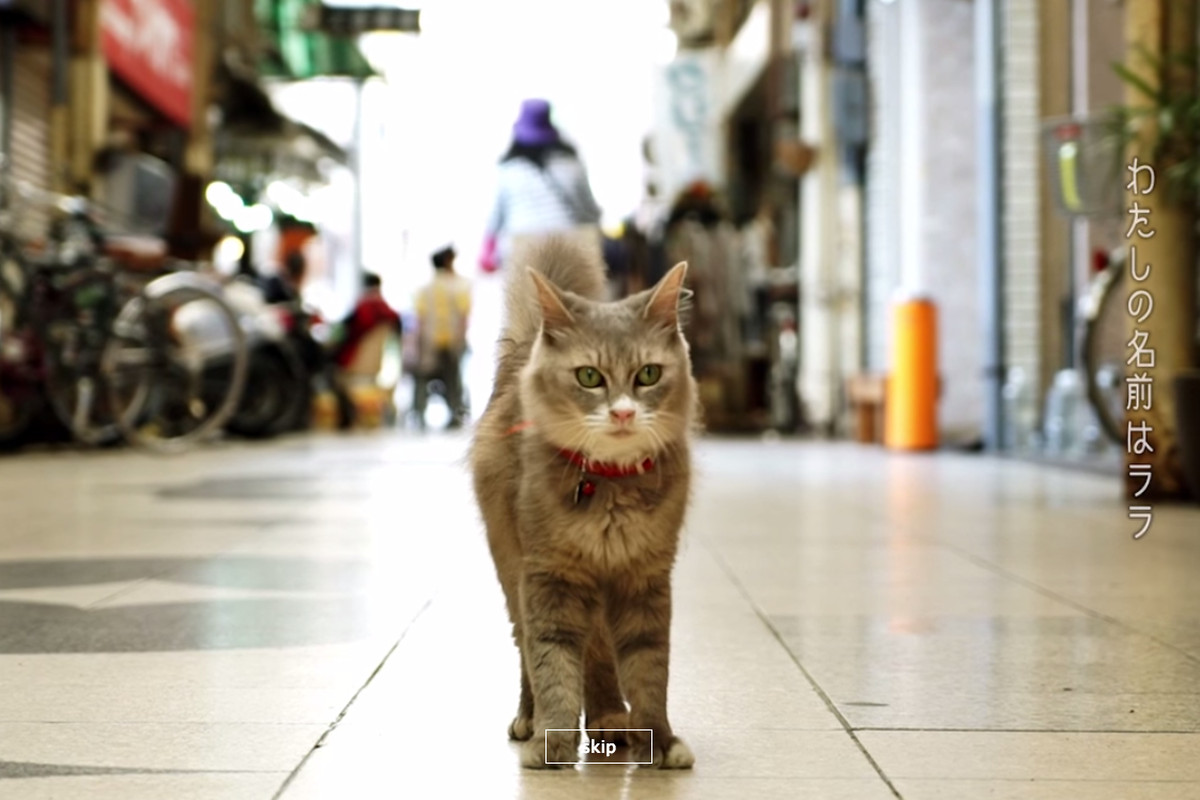

In [21]:
image1

In [24]:
url = "https://hips.hearstapps.com/hmg-prod/images/cute-photos-of-cats-in-grass-1593184777.jpg"
prompts = [
    # "Instruction: provide an answer to the question. Use the image to answer.\n",
    image1,
    "Question: What's on the picture? Answer:",
]
check_inference(model, processor, prompts, max_new_tokens=5)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:534: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


Question: What's on the picture? Answer: This is a cat.


In [9]:
def convert_to_rgb(image):
    # `image.convert("RGB")` would only work for .jpg images, as it creates a wrong background
    # for transparent images. The call to `alpha_composite` handles this case
    if image.mode == "RGB":
        return image

    image_rgba = image.convert("RGBA")
    background = Image.new("RGBA", image_rgba.size, (255, 255, 255))
    alpha_composite = Image.alpha_composite(background, image_rgba)
    alpha_composite = alpha_composite.convert("RGB")
    return alpha_composite

def ds_transforms(example_batch):
    image_size = processor.image_processor.image_size
    image_mean = processor.image_processor.image_mean
    image_std = processor.image_processor.image_std

    image_transform = transforms.Compose([
        convert_to_rgb,
        transforms.RandomResizedCrop((image_size, image_size), scale=(0.9, 1.0), interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=image_mean, std=image_std),
    ])

    prompts = []
    for i in range(len(example_batch['caption'])):
        # We split the captions to avoid having very long examples, which would require more GPU ram during training
        caption = example_batch['caption'][i].split(".")[0]
        prompts.append(
            [
                example_batch['image_url'][i],
                f"Question: What's on the picture? Answer: This is {example_batch['name'][i]}. {caption}</s>",
            ],
        )

    inputs = processor(prompts, transform=image_transform, return_tensors="pt").to(device)

    inputs["labels"] = inputs["input_ids"]

    return inputs


# load and prepare dataset
ds = load_dataset("TheFusion21/PokemonCards")
ds = ds["train"].train_test_split(test_size=0.002)
train_ds = ds["train"]
eval_ds = ds["test"]
train_ds.set_transform(ds_transforms)
eval_ds.set_transform(ds_transforms)

Generating train split:   0%|          | 0/13139 [00:00<?, ? examples/s]

# LoRA
After specifying the low-rank adapters (LoRA) config, we load the PeftModel using the get_peft_model utility function

In [10]:
model_name = checkpoint.split("/")[1]
config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "k_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
)
model = get_peft_model(model, config)

In [11]:
model.print_trainable_parameters()

trainable params: 19,750,912 || all params: 8,949,430,544 || trainable%: 0.2207


In [ ]:
training_args = TrainingArguments(
    output_dir=f"{model_name}-pokemon",
    learning_rate=2e-4,
    fp16=True,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=8,
    dataloader_pin_memory=False,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=40,
    eval_steps=20,
    logging_steps=20,
    max_steps=40,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True,
    report_to=None,
    optim="paged_adamw_8bit",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=eval_ds,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1463: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


Step,Training Loss,Validation Loss
20,0.637400,0.569331


In [25]:
# check generation again after finetuning
check_inference(model, processor, prompts, max_new_tokens=100)

Question: What's on the picture? Answer: This is a cat. It's a stray cat. It's a female cat. It's a cat that lives in the neighborhood.
